In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rinet.data_sim import random_mixture_sample, plot_1d_mixture  # plot_2d_mixture, correlation_to_covariance

# for reproducibility
SEED = 42
np.random.seed(SEED)


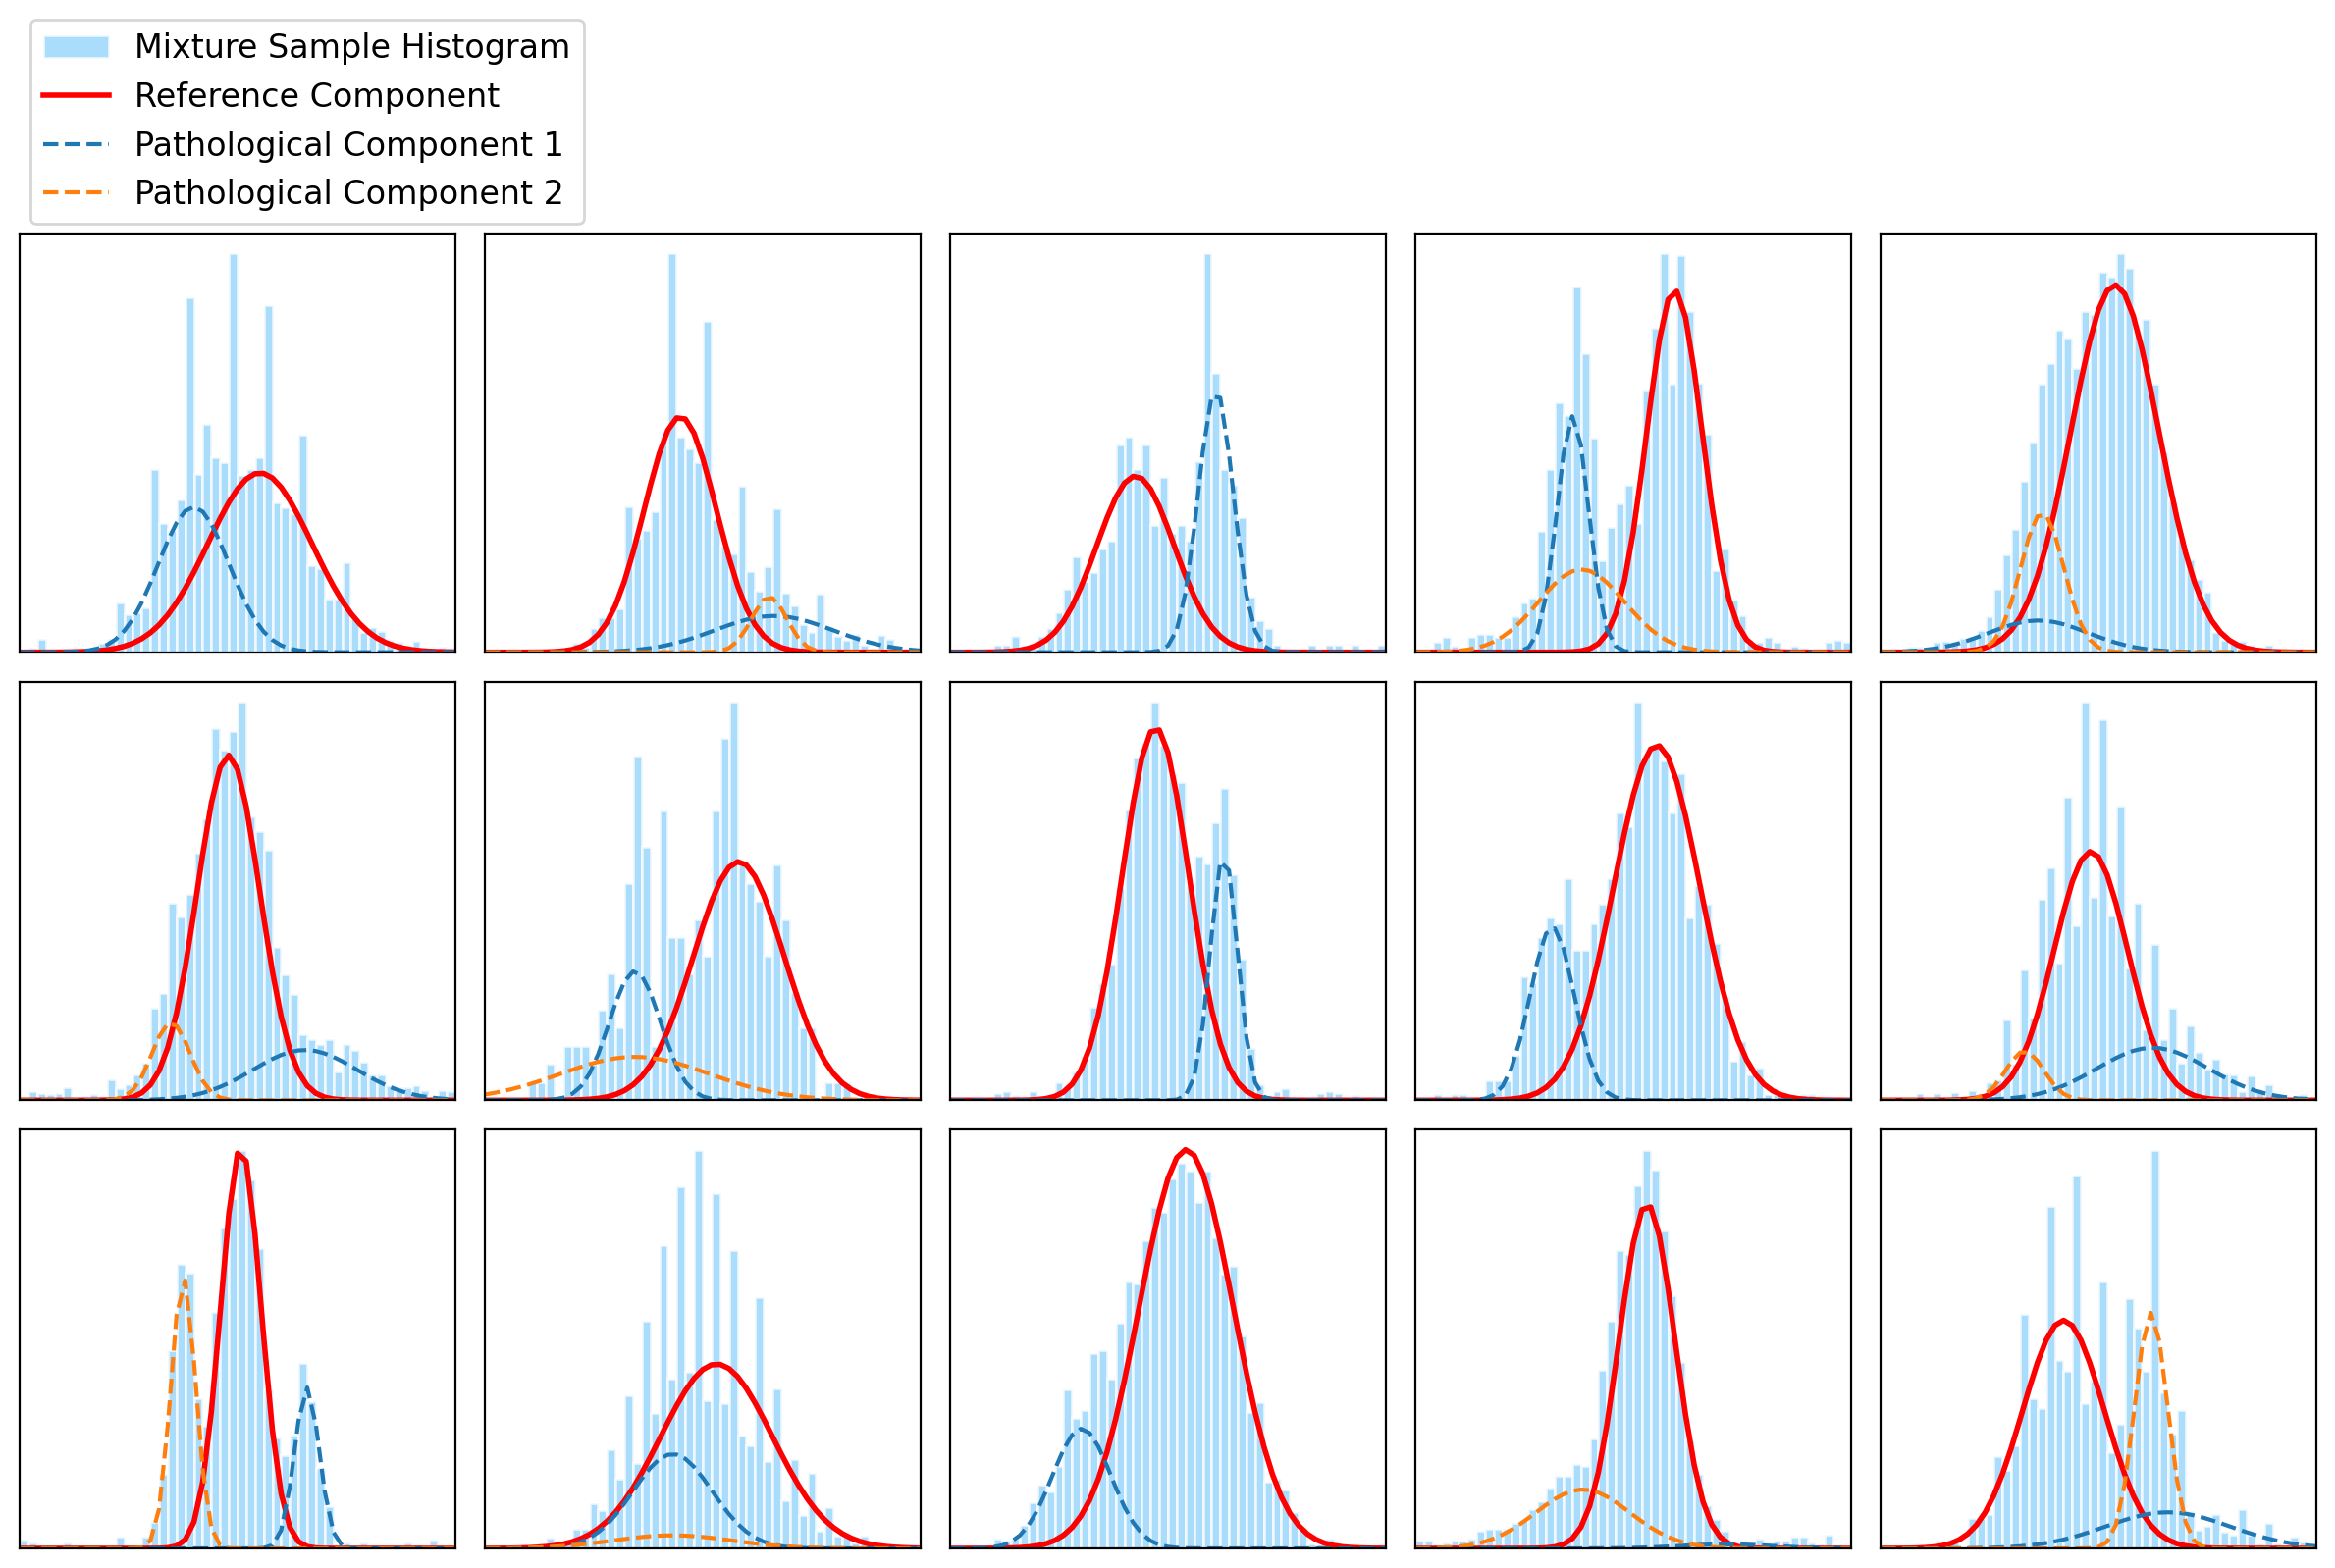

In [2]:
# plot 1D examples
    
n_dimensions = 1  # number of dimensions
n_components = [1, 2]  # possible number of pathological components
sample_sizes = [250, 5000]  # possible no. samples
mean_range = [-3, 3]  # min/max possible mean of distributions
pathological_dev_percentage_range = [30, 60]
p_frac_range = [0.15, 0.40]  # min/max pathological fraction

nc = 5
nr = 3
plt.figure(figsize=(12, 7), dpi=200)
for i in range(nc*nr):

    sample, mean_vectors, std_devs, comps, sizes = random_mixture_sample(
        n_dimensions=n_dimensions,
        n_components=np.random.choice(n_components),
        n_samples=np.random.uniform(sample_sizes[0], sample_sizes[1]),
        quantize_step=np.random.choice([0, 0.05, 0.1, 0.2]),
        mean_range=mean_range,
        p_frac_range=p_frac_range,
        pathological_dev_percentage_range=pathological_dev_percentage_range
    )  
    plt.subplot(nr, nc, i+1)

    plot_1d_mixture(
        sample,
        sizes,
        mean_vectors,
        std_devs,
        scope=[-3, 3]
    )
    plt.gca().set_xticks([])

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
# place legend to the right of all subplots
plt.gcf().legend(handles, labels,
                 loc="center left",     # position relative to bbox_to_anchor
                 bbox_to_anchor=(0.01, 1.06),  # (x, y) relative to figure
                 fontsize=12)

plt.tight_layout()
plt.savefig('1d_examples_3.png', bbox_inches="tight")


In [3]:
# # plot 2D examples

# n_dimensions = 2  # number of dimensions
# n_components = [1, 2]  # possible number of pathological components
# sample_sizes = [250, 10000]  # possible no. samples
    
# nc = 5
# nr = 5
# plt.figure(figsize=(12, 12), dpi=200)
# for i in range(nc*nr):
    
#     # sample from random Gaussian mixture
#     sample, mean_vectors, std_devs, corr_mats, comps, sizes = random_mixture_sample(
#         n_dimensions=n_dimensions, 
#         n_components=np.random.choice(n_components),
#         n_samples=np.random.uniform(sample_sizes[0], sample_sizes[1]),
#         quantize_step=np.random.choice([0, 0.05, 0.1, 0.2]),
#     )
    
#     cov_mats = [correlation_to_covariance(i, j) for i, j in zip(corr_mats, std_devs)]
    
#     plt.subplot(nr, nc, i+1)
    
#     plot_2d_mixture(
#         sample,
#         mean_vectors,
#         cov_mats,
#         standardize=True
#     )
